In [ ]:
!pip install -U tensorboard_plugin_profile
%load_ext tensorboard
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 47.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
from datetime import datetime
from packaging import version
import tensorflow as tf
import tensorflow_datasets as tfds
import os,time
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

tfds.disable_progress_bar()

(ds_train, ds_test), ds_info = tfds.load(
    'emnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print(ds_test)
print(ds_train)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label


def process_images(image, label):
    
    image = tf.image.resize(image, (224,224))
    return image, label

ds_train = ds_train.map(normalize_img)
print(ds_train)
ds_train = ds_train.map(process_images)
print(ds_train)


ds_test = ds_test.map(normalize_img)
ds_test = ds_test.map(process_images)
nclass=10 #10forcifar10

batchsize = [128,
#16,
#32,
#64,
#128
]
for bs in batchsize:
  ds_train = ds_train.batch(bs)
  ds_test = ds_test.batch(bs)
  print(bs)

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.0.0. Subsequent calls will reuse this data.
<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(224, 224, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
128


In [ ]:
#tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
from datetime import datetime
from packaging import version

import os
# Create a TensorBoard callback
logs = "VGG-drP2" + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '10,20')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


VGG9-**LCRM**

In [ ]:
model1 = keras.models.Sequential([
  keras.layers.Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), input_shape=(224,224,1)),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),


  keras.layers.DepthwiseConv2D(depth_multiplier=2,kernel_size=5,strides=(1,1),padding='same'),
  keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding="same"),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
  

  keras.layers.DepthwiseConv2D(depth_multiplier=2,kernel_size=3,strides=(1,1),padding='same'),
  #keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same"),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),

  #keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same"),
  keras.layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),

 # keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same"),
  keras.layers.DepthwiseConv2D(depth_multiplier=2,kernel_size=3,strides=(1,1),padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
  
  #keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same"),
  keras.layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
  #keras.layers.Conv2D(filters=nclass,kernel_size = (1,1), activation='relu', padding="same"), #add number of classes here
  #keras.layers.AvgPool2D(pool_size=(5,5))

  keras.layers.Flatten(),

  keras.layers.Dense(1024, activation='relu'),
  keras.layers.Dropout(0.5),

  keras.layers.Dense(1024, activation='relu'),
  keras.layers.Dropout(0.5),

  keras.layers.Dense(62, activation='softmax')
   
  ])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 64)        7808      
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 54, 54, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 64)       0         
 )                                                               
                                                                 
 depthwise_conv2d (Depthwise  (None, 26, 26, 128)      3328      
 Conv2D)                                                         
                                                        

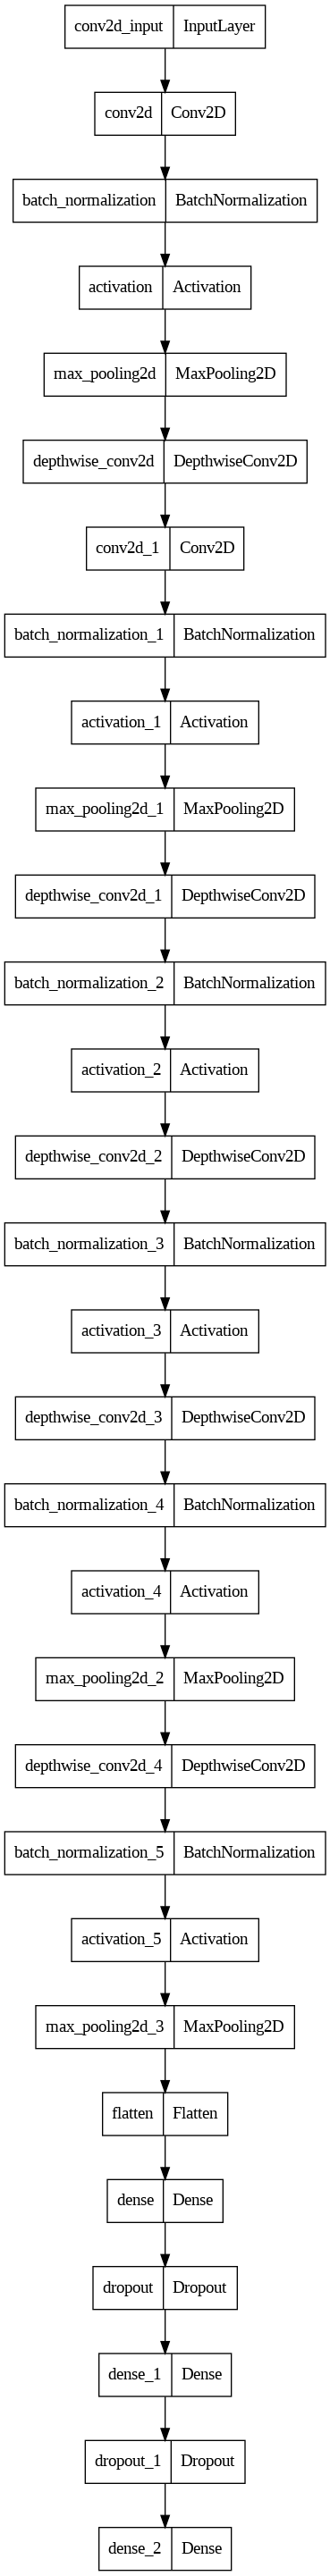

In [ ]:
model1.summary()
tf.keras.utils.plot_model(model1, "model.png")

In [ ]:
model=model1

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  #tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
  #@measure_energy(handler=csv_handler, domains=[NvidiaGPUDomain(0)])
  #@measure_energy(handler=csv_handler,domains=[RaplPackageDomain(1), NvidiaGPUDomain(0),RaplDramDomain(0)])
  #def foo():
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]
model.fit(ds_train,  epochs=5, validation_data=ds_test, callbacks = [tensorboard,callbacks])
  #for _ in range(1):
   #   foo()
  #..
#model.fit(ds_train,  epochs=10, validation_data=ds_test)
test_loss, test_acc = model.evaluate(ds_test, verbose=2)

Epoch 1/5
5453/5453 [==============================] - 443s 78ms/step - loss: 0.6939 - accuracy: 0.7764 - val_loss: 0.4598 - val_accuracy: 0.8407
Epoch 2/5
5453/5453 [==============================] - 463s 85ms/step - loss: 0.5135 - accuracy: 0.8244 - val_loss: 0.4512 - val_accuracy: 0.8416
Epoch 3/5
5453/5453 [==============================] - 463s 85ms/step - loss: 0.4744 - accuracy: 0.8360 - val_loss: 0.4080 - val_accuracy: 0.8538
Epoch 4/5
5453/5453 [==============================] - 463s 85ms/step - loss: 0.4493 - accuracy: 0.8434 - val_loss: 0.4064 - val_accuracy: 0.8544
Epoch 5/5
5453/5453 [==============================] - 424s 78ms/step - loss: 0.4323 - accuracy: 0.8483 - val_loss: 0.3839 - val_accuracy: 0.8597
909/909 - 42s - loss: 0.3839 - accuracy: 0.8597 - 42s/epoch - 46ms/step


In [ ]:

model.fit(ds_train,  epochs=5, validation_data=ds_test, callbacks = [tensorboard,callbacks])

Epoch 1/5
5453/5453 [==============================] - 464s 85ms/step - loss: 0.4202 - accuracy: 0.8515 - val_loss: 0.3787 - val_accuracy: 0.8617
Epoch 2/5
5453/5453 [==============================] - 465s 85ms/step - loss: 0.4120 - accuracy: 0.8538 - val_loss: 0.3957 - val_accuracy: 0.8585
Epoch 3/5
5453/5453 [==============================] - 462s 85ms/step - loss: 0.4060 - accuracy: 0.8560 - val_loss: 0.3786 - val_accuracy: 0.8624
Epoch 4/5
5453/5453 [==============================] - 423s 78ms/step - loss: 0.4009 - accuracy: 0.8571 - val_loss: 0.3714 - val_accuracy: 0.8643
Epoch 5/5
5453/5453 [==============================] - 421s 77ms/step - loss: 0.3961 - accuracy: 0.8588 - val_loss: 0.3608 - val_accuracy: 0.8682


In [ ]:
model1.save('vgglcrmmodelOCR')
model1.save_weights('vgglcrmwtOCR/model1wts')

In [ ]:
sizeof(vgglcrmmodelOCR)

In [ ]:
model.save('vgg_reallcrmOCR.h5')

In [ ]:
model2.save('vgglOCR')

## **VGG9**

In [ ]:
model2= keras.models.Sequential([
  keras.layers.Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), input_shape=(224,224,1)),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),


  #keras.layers.DepthwiseConv2D(depth_multiplier=8,kernel_size=5,strides=(1,1),padding='same'),
  keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding="same"),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
  

  #keras.layers.DepthwiseConv2D(depth_multiplier=2,kernel_size=3,strides=(1,1),padding='same'),
  keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same"),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),

  keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same"),
  #keras.layers.DepthwiseConv2D(depth_multiplier=2,kernel_size=3,strides=(1,1),padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),

  keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same"),
  #keras.layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
  
  keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding="same"),
  #keras.layers.DepthwiseConv2D(depth_multiplier=1,kernel_size=3,strides=(1,1),padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation('relu'),
  keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
  #keras.layers.Conv2D(filters=nclass,kernel_size = (1,1), activation='relu', padding="same"), #add number of classes here
  #keras.layers.AvgPool2D(pool_size=(5,5))

  keras.layers.Flatten(),

  keras.layers.Dense(1024, activation='relu'),
  keras.layers.Dropout(0.5),

  keras.layers.Dense(1024, activation='relu'),
  keras.layers.Dropout(0.5),

  keras.layers.Dense(100, activation='softmax')
   
  ])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        7808      
                                                                 
 batch_normalization_6 (Batc  (None, 54, 54, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 54, 54, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       204928    
                                                                 
 batch_normalization_7 (Batc  (None, 26, 26, 128)     

In [ ]:
logs = "VGG-ocrnolcrm" + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '10,20')

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  #tensorboard = TensorBoard(os.path.join('energylog',f'{batchsize}_{time.time()}'))
  #@measure_energy(handler=csv_handler, domains=[NvidiaGPUDomain(0)])
  #@measure_energy(handler=csv_handler,domains=[RaplPackageDomain(1), NvidiaGPUDomain(0),RaplDramDomain(0)])
  #def foo():
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]
model2.fit(ds_train,  epochs=5, validation_data=ds_test, callbacks = [tensorboard,callbacks])
  #for _ in range(1):
   #   foo()
  #..
#model.fit(ds_train,  epochs=10, validation_data=ds_test)
test_loss, test_acc = model2.evaluate(ds_test, verbose=2)

Epoch 1/5
5453/5453 [==============================] - 476s 86ms/step - loss: 0.6562 - accuracy: 0.7882 - val_loss: 0.4328 - val_accuracy: 0.8489
Epoch 2/5
5453/5453 [==============================] - 462s 85ms/step - loss: 0.4521 - accuracy: 0.8449 - val_loss: 0.4211 - val_accuracy: 0.8501
Epoch 3/5
5453/5453 [==============================] - 499s 92ms/step - loss: 0.3989 - accuracy: 0.8596 - val_loss: 0.3632 - val_accuracy: 0.8656
Epoch 4/5
5453/5453 [==============================] - 461s 85ms/step - loss: 0.3758 - accuracy: 0.8658 - val_loss: 0.3562 - val_accuracy: 0.8679
Epoch 5/5
5453/5453 [==============================] - 460s 84ms/step - loss: 0.3628 - accuracy: 0.8696 - val_loss: 0.3490 - val_accuracy: 0.8721
909/909 - 43s - loss: 0.3490 - accuracy: 0.8721 - 43s/epoch - 47ms/step


In [ ]:
model.save('vgg_OCR.h5')